# Identificar fronteras no lineales

In [82]:
from sklearn.datasets.samples_generator import make_circles,make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [83]:
X,Y = make_circles(100,factor=.1,noise=.1)

In [84]:
def plt_svc(model,ax= None,plot_support = True):
    """plot de la función de decisión para una clasifiación en 2D con SVC"""
    
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0],ylim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors="k", levels= [-1,0,1], alpha= 0.5, linestyles =["--","-","--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth = 1, facecolors = "blue")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [85]:
def plot_svm(N=10,ax=None):
    X, Y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    
    model = SVC(kernel="linear",C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=Y,s = 50,cmap = "autumn")
    ax.set_xlim(-1.4)
    ax.set_ylim(-1.6)
    plt_svc(model,ax)

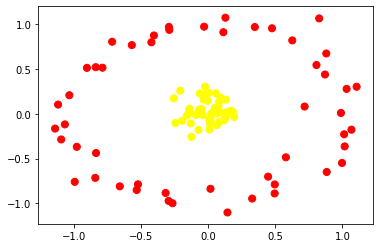

In [86]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

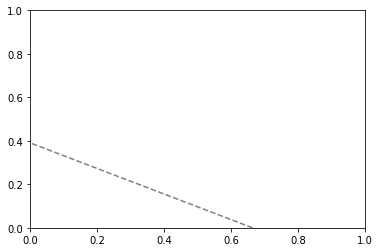

In [87]:
plt_svc(SVC(kernel="linear").fit(X,Y),plot_support=False)

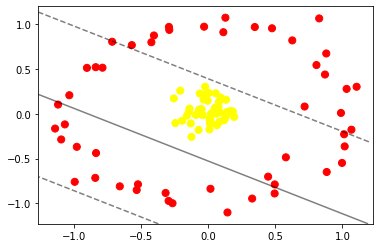

In [88]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y),plot_support=False)

In [89]:
r = np.exp(-(X**2).sum(1))

In [90]:
r

array([0.99346851, 0.99825661, 0.95765334, 0.99594392, 0.31650003,
       0.27333499, 0.35419841, 0.96588792, 0.96156108, 0.99812858,
       0.99158324, 0.49564518, 0.94781722, 0.30965127, 0.3597999 ,
       0.37530145, 0.32995211, 0.94678448, 0.99675633, 0.33684356,
       0.96961312, 0.32129598, 0.38387042, 0.34151735, 0.26600258,
       0.95457231, 0.31535202, 0.98797105, 0.39692771, 0.20959602,
       0.43181008, 0.99172713, 0.41160473, 0.96309339, 0.99186305,
       0.29603687, 0.9943088 , 0.31927093, 0.34759243, 0.93257966,
       0.34392162, 0.44328668, 0.36550428, 0.98081698, 0.959254  ,
       0.99660072, 0.33583306, 0.38674791, 0.97949097, 0.3396263 ,
       0.95864058, 0.98465715, 0.4034682 , 0.99856923, 0.56394758,
       0.91034601, 0.98159035, 0.92113251, 0.30005156, 0.34559775,
       0.31076915, 0.29316883, 0.29092481, 0.99275927, 0.97211107,
       0.31223827, 0.41427283, 0.36639226, 0.1627429 , 0.97932572,
       0.40960665, 0.99691226, 0.26852356, 0.89699421, 0.35619

In [91]:
from mpl_toolkits import mplot3d

In [92]:
def plot_3D(elev=30,azim=30,X=X,Y=Y,r=r):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=Y,s=50,cmap="autumn")
    ax.view_init(elev=elev,azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [93]:
from ipywidgets import interact, fixed

In [94]:
interact(plot_3D,elev=[-90,-60,-30,0,30,60,90],
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],
         X= fixed(X), Y = fixed(Y),r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-6.62761548e-02,  4.64798894e-02],
       [-3.89756212e-02, -1.50269822e-02],
       [-1.92813947e-01, -7.80525704e-02],
       [ 6.37431757e-02,  1.06662055e-03],
       [-1.06592160e+00, -1.19344366e-01],
       [ 9.97800596e-01, -5.49045652e-01],
       [ 4.96084664e-01, -8.89830341e-01],
       [ 1.84870770e-01,  2.30276040e-02],
       [ 1.94671725e-01, -3.60570905e-02],
       [ 3.77128526e-02,  2.12347326e-02],
       [ 9.08818844e-02,  1.38876545e-02],
       [ 1.84048486e-02, -8.37589539e-01],
       [ 6.20337621e-03,  2.31419795e-01],
       [ 1.06796219e+00, -1.78228253e-01],
       [-2.91016975e-01,  9.68254283e-01],
       [ 9.89926796e-01,  8.40603604e-03],
       [-1.03260394e+00,  2.06244662e-01],
       [-6.16237426e-02,  2.25579927e-01],
       [ 5.67304515e-02,  5.53148700e-03],
       [-6.56846439e-01, -8.10363767e-01],
       [ 1.73216286e-01,  2.92275425e-02],
       [ 4.76486861e-01,  9.53075438e-01],
       

In [95]:
rbf = SVC(kernel="rbf",C=1E6)
rbf.fit(X,Y)

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

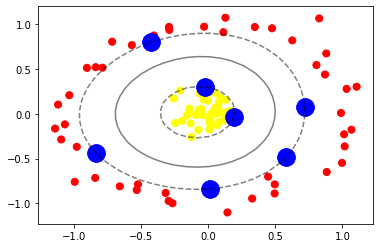

In [96]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1],s=300,facecolors="blue")

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Ajustar los parámetros de SVM

In [109]:
X,Y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.2)

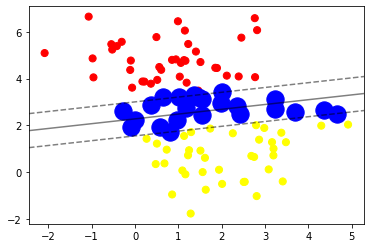

In [112]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
model =SVC(kernel="linear",C=10)
model.fit(X,Y)
plt_svc(model)

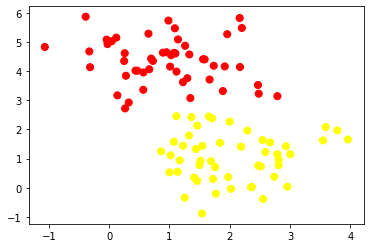

In [99]:
X, Y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

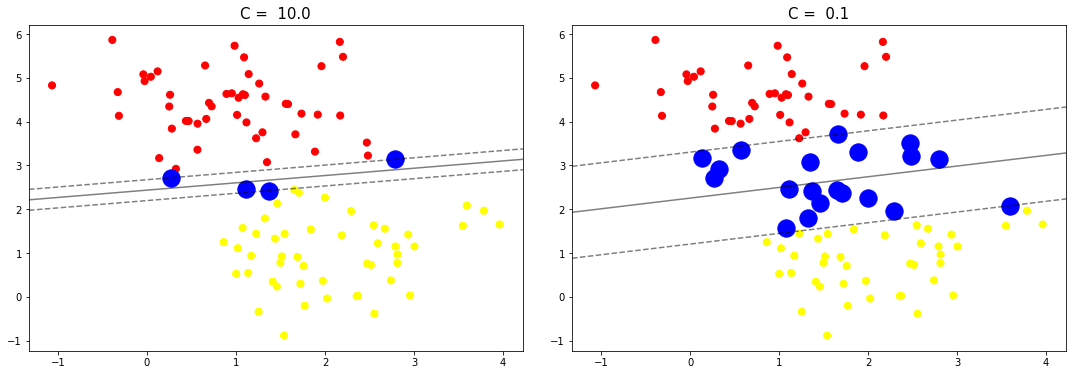

In [108]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.05,right=0.95,wspace=0.1)

for ax_i,C in zip(ax,[10.0,0.1]):
    model = SVC(kernel="linear",C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    plt_svc(model,ax_i)
    ax_i.set_title("C = {0: .1f}".format(C),size=15)